In [1]:
# IMPORTING ALL NECESSARY LIBRARIES

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', False)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [38]:
# IMPORTING THE TRAINING FILE

df_train = pd.read_csv("C:\\Users\\sivac\\Documents\\Python Projects\\Banco Santander Kaggle\\input\\train.csv")
df_test = pd.read_csv("C:\\Users\\sivac\\Documents\\Python Projects\\Banco Santander Kaggle\\input\\test.csv")



In [39]:
# PREPARING TRAIN DATA AND TEST DATA

df_train.drop('ID_code', axis=1, inplace=True)
y = df_train['target']
x = df_train.drop('target', axis=1)

ID = df_test.ID_code
test = df_test.drop('ID_code', axis=1)

In [41]:
# STANDARDIZING FEATURES USING QUANTILE TRANSFORMER
from sklearn.preprocessing import QuantileTransformer

quantileTransformer = QuantileTransformer(output_distribution='normal')
colNames = x.columns

x = quantileTransformer.fit_transform(x)
x = pd.DataFrame(data=x, columns=colNames)

test = quantileTransformer.fit_transform(test)
test = pd.DataFrame(data=test, columns=colNames)

In [42]:
# Running a Logistic Regression

from sklearn.linear_model import LogisticRegression

# Training the model using the training data

model = LogisticRegression()
model.fit(x, y)
train_prob1 = model.predict_proba(x)[:,0]
train_prob2 = model.predict_proba(x)[:,1]

logRegCols_train = pd.DataFrame({'logReg_0_prob': train_prob1, 'logReg_1_prob': train_prob2})
x = pd.concat([x,logRegCols_train], axis=1, ignore_index=True)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201
0,-0.512456,-1.220693,0.425845,-0.747391,0.198123,-0.463678,-0.272681,0.544995,-1.538994,-1.432304,0.415357,1.061741,-0.057491,-1.699595,0.472918,-0.013994,-1.442611,-0.216556,-1.393930,2.439460,-0.369323,-0.113921,-0.530497,-0.997920,0.906210,-0.762781,-0.151845,0.410108,-0.749540,0.371832,0.830229,1.139075,-1.240099,0.436763,-0.394833,1.265278,-0.471464,0.834629,-1.385183,0.728807,0.154037,-0.262766,0.422744,1.542897,0.400496,0.218520,-2.000250,-0.130018,0.116751,-1.439915,...,0.408763,0.023697,0.616629,0.631307,-1.013654,-1.532429,-0.001756,0.309895,-0.695205,-1.466138,-1.186815,-1.105293,1.812165,-1.304608,-0.671081,0.411348,1.420665,-0.381424,-1.021225,-1.397603,0.119925,0.593991,-0.213915,-1.343016,-0.887242,0.608927,-0.262184,-0.277808,-1.013141,-0.727970,0.227183,1.171047,1.351962,2.251898,0.867310,-0.715167,0.504764,-0.131677,0.262312,-1.127517,0.797924,-0.399427,0.153287,-1.626981,0.956039,-0.325882,-1.032372,0.139765,0.971862,0.028138
1,0.291572,-0.549086,1.167779,-0.608294,0.734140,1.603196,0.237411,0.015836,0.747270,0.314338,-0.150036,1.847976,-0.008782,-0.041718,-0.831017,-2.385072,1.658532,-1.434548,-0.852245,2.077338,-1.784164,-1.744230,1.478948,0.620431,-0.854323,0.767759,-1.308515,-0.836866,-0.604143,-1.845621,-0.191761,-1.132992,0.601173,0.958583,-0.106030,-0.570161,0.176451,-0.024197,0.055573,0.682044,-0.480770,-1.206200,-1.917870,0.608973,-1.233410,-1.636215,-1.378928,1.125509,1.726018,1.099772,...,0.544406,0.034945,-1.507396,0.376194,-0.933808,-0.819182,0.512634,0.095918,0.414864,1.028136,-1.032166,0.906854,-0.353655,-0.799583,0.573535,1.714513,-0.278390,0.412294,1.257021,1.064040,0.244953,0.996220,1.406160,-0.325371,-0.540651,1.844293,-0.669779,2.918382,-0.482474,-0.375936,-1.776976,0.153503,0.995056,-0.173909,-0.383319,-0.423030,-0.461563,-1.053149,0.943353,0.105088,0.440987,2.032295,-0.746785,1.471827,1.011121,-0.094115,0.773523,0.399695,0.431823,0.568177
2,-0.621903,-0.247466,0.482212,0.464701,-0.297551,-0.443104,1.683973,-0.477049,-1.538755,-1.242157,-0.136637,-1.337586,0.830234,-0.251524,-0.004334,0.156754,-0.584973,0.545432,-1.323275,0.947500,0.651050,0.108171,-1.033896,0.877865,-1.295030,-1.647673,-0.618433,-1.078216,0.371127,0.425185,-0.377522,0.948083,-0.599768,0.882483,-0.652339,0.028872,0.751146,0.401805,0.072880,0.048575,-0.755736,-1.122303,0.361101,1.523370,-0.849768,0.183914,-0.060603,0.541077,0.487799,-1.184739,...,-1.058291,-1.297515,-2.777111,0.443586,1.322652,0.532450,2.178785,0.324588,-0.930036,0.913831,-0.418818,-0.948199,0.242123,0.222433,0.779269,-0.197210,0.766996,0.337710,-1.631414,-0.533233,-1.422841,-0.802434,0.678136,-0.205148,0.270865,-1.134049,-0.945791,-0.038599,-0.266962,-0.443418,-1.551703,-1.249487,1.054338,-0.261957,-1.086338,0.283593,-1.329403,-1.646678,-0.054805,0.768474,-0.152238,-0.400642,1.062848,2.189457,-1.636522,-0.656498,-0.382278,0.263586,0.947164,0.052836
3,0.160827,-0.118346,-0.579754,0.154765,0.874191,0.328109,0.483772,-0.390342,-1.926437,0.416874,0.306715,0.997328,-0.931140,0.611934,-0.398399,0.581038,0.529863,0.734960,0.082203,0.139326,1.098083,-0.552417,0.866163,-0.509467,0.366308,0.234898,0.830606,0.123965,0.445858,-0.806500,-0.842899,0.038447,-0.703324,-2.195042,-1.518426,-1.937169,2.035303,-1.292552,-0.316067,-0.004660,0.314388,-1.996144,0.700989,-0.889663,-0.245276,-0.500633,0.474008,-2.475750,-1.192443,-0.965914,...,-0.005703,0.667460,2.290460,-1.555643,-1.168197,0.631689,0.258558,0.512004,0.610611,1.514169,1.275045,-1.391349,-1.464934,-0.383701,-0.985610,0.162166,-1.474482,-0.759676,-1.650285,-0.949299,-0.176410,2.291233,-0.728257,-1.176318,2.011384,0.685902,-1.039818,1.127420,-0.178857,-1.222238,0.114299,-0.26

In [44]:
test_prob1 = model.predict_proba(test)[:,0]
test_prob2 = model.predict_proba(test)[:,1]
logRegCols_test = pd.DataFrame({'logReg_0_prob': test_prob1, 'logReg_1_prob': test_prob2})
test = pd.concat([test,logRegCols_test], axis=1, ignore_index=True)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201
0,0.171048,2.448753,0.844899,1.261705,0.191608,0.258532,0.482555,0.453660,0.446495,0.884816,-0.410114,-0.160376,-0.268404,-1.740716,0.014989,-0.158065,-0.578999,-2.044320,0.041628,0.401826,-1.737889,0.186811,-0.890031,0.093512,-1.022858,1.547931,-0.887095,-0.613544,0.209587,-0.433726,0.628821,-0.502681,0.910094,-0.357045,-0.162852,0.796269,-0.698964,-0.934608,-0.178694,2.134071,-1.019293,1.613210,0.049975,0.782599,0.734127,-0.829394,0.293362,2.274529,0.214042,0.021502,...,-0.048597,-0.816688,2.919965,0.525052,-1.357118,0.058529,-0.169910,0.169382,-1.794657,-0.944496,-1.023693,-0.961205,-0.936513,0.655997,-1.078567,0.476635,-0.129225,-1.183183,0.953666,0.440538,1.037638,1.498343,-0.269929,0.210409,0.225508,-0.495665,-0.480939,-0.075520,-0.311074,0.238361,-1.856235,-1.042771,1.988425,0.561479,0.115038,-1.053701,-0.470558,0.845246,-1.151671,1.403682,-2.462686,-0.227543,-1.356605,1.707637,0.294402,2.094729,-0.142082,-0.465600,0.809437,0.190563
1,-0.641307,0.655155,0.236976,-0.697562,-1.089990,0.084123,0.681669,0.552400,-1.347222,-1.222422,-0.304156,0.487920,0.415634,-1.239128,-0.799075,-0.854512,-0.865051,1.519425,1.781771,-1.560770,-0.149833,-1.687547,0.319329,-1.093272,1.429052,-0.515878,-0.178564,-1.722564,0.206202,-0.744694,-0.305810,0.497768,-0.136083,0.152515,-1.470145,-0.546576,1.451933,-1.600224,0.510076,-0.527457,1.936385,-0.923194,-0.872867,0.575267,-1.101893,-1.293067,0.754915,-0.392777,-0.679098,-0.450447,...,-1.944024,-0.265851,0.140782,0.587441,1.760807,1.445655,-0.741923,0.929529,0.547381,0.148838,-1.139356,0.363804,-1.356704,-0.723484,0.614558,1.665050,0.689529,-0.629439,-0.156196,-1.346508,1.140377,-0.773615,-1.366920,-0.596527,0.249321,-1.473083,-0.353716,0.966068,0.562007,1.360648,-1.173855,-0.580758,1.288269,-0.990676,0.854019,0.106210,0.154193,0.191811,1.582160,0.441847,-0.637954,1.779138,-0.689849,0.419218,-0.599726,0.968458,1.052190,-1.665410,0.757004,0.242996
2,-1.839843,-2.503123,-0.142530,0.092174,-0.464355,1.932897,-0.530705,0.993163,0.286401,0.494432,-0.856434,0.042553,-1.735894,-0.943035,1.432167,-0.785561,0.225336,1.191482,0.701608,0.983941,-0.106566,-0.570411,0.150382,-0.383024,-1.474653,-0.296607,-2.072568,0.552217,2.344748,-0.566027,-0.173469,-0.294957,1.389674,1.777027,0.879745,1.144896,0.542497,-0.342661,-0.570941,0.044123,-1.495068,-0.560272,-2.406195,2.131195,-0.189473,1.252957,-0.382564,-0.701469,-0.484421,-1.000234,...,0.562500,-0.029696,0.046141,-0.036045,-0.548730,2.046630,0.592833,0.043106,1.319212,-0.462261,-1.438556,-1.288623,0.322547,-1.171678,0.382687,-0.007415,-1.221118,1.409534,-0.008478,0.407642,-0.319676,-0.372801,0.913464,1.452485,-0.994900,1.361108,-0.913347,0.705148,-0.068279,-1.104379,-0.327522,0.963271,1.210276,0.088906,-1.228080,0.623395,-0.948792,0.372839,-0.821282,1.147159,0.061154,-0.289329,-1.618271,1.516405,-1.799772,-1.961173,1.354340,-1.943342,0.959395,0.040605
3,-0.639421,0.062449,0.462118,-0.105159,-1.325506,1.005898,-0.479353,1.088019,0.820215,-0.111827,-0.076893,-0.275237,0.129076,0.982283,0.465246,0.347983,0.276772,-1.390275,-1.776449,1.074747,0.174342,-0.548235,-0.410043,2.460022,0.749616,1.614466,0.838214,-0.129316,-0.331025,0.596546,1.899169,-0.374230,1.040750,-1.004158,-1.128934,-1.198605,1.203211,-1.066226,1.344630,2.157763,0.198952,-1.433698,1.778993,-0.415634,-0.463276,-0.021835,0.825538,1.702021,1.425817,-1.351408,...,-0.580201,-0.560453,-0.346803,-1.134138,0.368215,0.226080,-0.425123,1.027641,-0.303359,-1.055536,-1.146683,-0.598888,-1.457284,1.045772,-0.825414,0.797821,0.764171,0.023155,1.627054,0.758670,-2.046036,2.072070,-0.759992,-0.289381,-0.376036,0.687284,0.868187,-0.495643,2.365338,-0.139710,0.527176,-0.745570

In [45]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x,y, stratify=y, random_state=1, test_size=0.25)

Confustion Matrix for Training Data - Gaussian Naive Bayes
[[126706   8221]
 [  7011   8062]]
Confustion Matrix for Test Data - Gaussian Naive Bayes
[[42287  2688]
 [ 2371  2654]]
Classification Report for Training Data - Gaussian Naive Bayes
             precision    recall  f1-score   support

          0       0.95      0.94      0.94    134927
          1       0.50      0.53      0.51     15073

avg / total       0.90      0.90      0.90    150000

Classification Report for Test Data - Gaussian Naive Bayes
             precision    recall  f1-score   support

          0       0.95      0.94      0.94     44975
          1       0.50      0.53      0.51      5025

avg / total       0.90      0.90      0.90     50000

AUROC Plot from Gaussian Naive Bayes: 0.8801


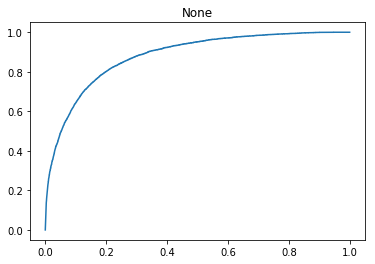

In [46]:
# Running a Naive Bayes Guassian Model:
# Guassian model because the predictors follow a Normal Distribution

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Training the model using the training data

model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
predictions = model.predict(x_validation)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion Matrix Comparison
print("Confustion Matrix for Training Data - Gaussian Naive Bayes")
print(confusion_matrix(y_train, train_predictions))
print("Confustion Matrix for Test Data - Gaussian Naive Bayes")
print(confusion_matrix(y_validation, predictions))

# Classification Report Comparison
print("Classification Report for Training Data - Gaussian Naive Bayes")
print(classification_report(y_train, train_predictions))
print("Classification Report for Test Data - Gaussian Naive Bayes")
print(classification_report(y_validation, predictions))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predictions = model.predict_proba(x_validation)[:,1]
roc_auc_score(y_validation, predictions, average='weighted')

fpr, tpr, threshold = roc_curve(y_validation, predictions)

# Calculating the AUC Score
auc = np.trapz(tpr,fpr)
pltTitle = print("AUROC Plot from Gaussian Naive Bayes:", "%.4f" %auc)

# Plotting the ROC Curve
plt.plot(fpr,tpr)
plt.title(pltTitle)
plt.show() 

In [50]:
# APPLYING THE MODEL TO TEST DATA

predictions = model.predict_proba(test)[:,1]
output = pd.DataFrame({'ID_code': ID, 'target': predictions})
output.to_csv("C:\\Users\\sivac\\Documents\\Python Projects\\Banco Santander Kaggle\\output\\Submission 18 - ENS-LOG-NB-QUANT.csv", index=False)